# Tabla de detalle de compra

# 1. Importacion de librerias, lectura de archivo y primeras visualizaciones

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Lectura del archivo
Detalle_compra = pd.read_csv("PurchasesFINAL12312016.csv",sep=',')

In [3]:
#Comprobamos la cantidad de registros 
np.shape (Detalle_compra)

(2372474, 16)

In [4]:
#Visualizamos las primeras 5 filas
Detalle_compra.head ()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [5]:
#Corroboramos el tipo de dato de las columnas
print (Detalle_compra.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [6]:
#Verificamos la cantidad de datos faltantes por columna
print(Detalle_compra.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [7]:
#Verificamos las filas con valores nulos
Detalle_compra_filas_nulas = Detalle_compra.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Detalle_compra_filas_con_nulos = Detalle_compra [Detalle_compra_filas_nulas]

#Imprimimos las filas con valores nulos
if not Detalle_compra_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Detalle_compra_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
                 InventoryId  Store  Brand                 Description Size  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN   

         VendorNumber                   VendorName  PONumber      PODate  \
1109668         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1112426         12546  JIM BEAM BRANDS COMPANY         10938  2016-06-27   
1116302          9552  M S WALKER INC                  10972  2016-06-29   

        ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  \
1109668    2016-07-04  2016-07-13  2016-08-16           6.93         7   
1112426    2016-07-09  2016-07-13  2016-08-16           6.93         6   
1116302    2016-07-07  2016-07-13  2016-08-21          91.83         1   

         Dollars  Classification  
1109668  

In [8]:
# Verificamos si hay filas duplicadas
filas_duplicadas = Detalle_compra.duplicated()

# Contamos el número de filas duplicadas
contar_filas_duplicadas = filas_duplicadas.sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Detalle compra: {contar_filas_duplicadas}')

#Imprimimos
if contar_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Detalle compra:")
    print(Detalle_compra[filas_duplicadas])

Número de filas duplicadas en la tabla Detalle compra: 0


In [9]:
#Verificamos el tipo de dato de cada columna
print(Detalle_compra.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [10]:
#Convertimos las columnas que tienen dato fecha al formato correcto

# Listamos las columnas a convertir
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Convertimos las columnas a formato datetime con un ciclo For
for col in date_columns:
    Detalle_compra.loc[:, col] = pd.to_datetime(Detalle_compra.loc[:, col], errors='coerce')

#Imprimimos para verificar los cambios
print(Detalle_compra.dtypes) 

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


# 2. Trabajamos con los valores faltantes

Revisamos los valores nulls de la columna Size

In [11]:
#Filtramos las filas de Size que tiene valores nulos
null_size_rows = Detalle_compra[Detalle_compra['Size'].isnull()]

#Imprimimos las filas nulls
print(null_size_rows)

                 InventoryId  Store  Brand                 Description Size  \
1109668    34_PITMERDEN_3121     34   3121    Pinnacle Rainbow Sherbet  NaN   
1112426    34_PITMERDEN_5678     34   5678      Skinnygirl Pina Colada  NaN   
1116302  39_EASTHALLOW_15365     39  15365  Alabaster 07 Tinta de Toro  NaN   

         VendorNumber                   VendorName  PONumber  \
1109668         12546  JIM BEAM BRANDS COMPANY         10938   
1112426         12546  JIM BEAM BRANDS COMPANY         10938   
1116302          9552  M S WALKER INC                  10972   

                      PODate        ReceivingDate          InvoiceDate  \
1109668  2016-06-27 00:00:00  2016-07-04 00:00:00  2016-07-13 00:00:00   
1112426  2016-06-27 00:00:00  2016-07-09 00:00:00  2016-07-13 00:00:00   
1116302  2016-06-29 00:00:00  2016-07-07 00:00:00  2016-07-13 00:00:00   

                     PayDate  PurchasePrice  Quantity  Dollars  Classification  
1109668  2016-08-16 00:00:00           6.93     

Observamos que tenemos 3 valores faltantes de un total de 2372474 y estos datos no son recuperables, por lo cual se opta por eliminar estos 3 registros

In [12]:
#Eliminamos las filas con nulls
Detalle_compra = Detalle_compra[Detalle_compra['Size'].notna()]


In [13]:
#Verificamos la cantidad de datos faltantes por columna
print(Detalle_compra.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [14]:
#Comprobamos la cantidad de registros 
np.shape (Detalle_compra)

(2372471, 16)

In [15]:
# Verificamos si hay valores negativos en las columnas numéricas
negativos = Detalle_compra.select_dtypes(include=['number']) < 0

#Imprimimos los nombres de las columnas que tienen valores negativos
negativos_columna = negativos.any()

# Filtramos las columnas que tienen al menos un valor negativo
columnas_con_negativos = negativos_columna[negativos_columna].index.tolist()

# Imprimimos los resultados
if columnas_con_negativos:
    print(f"Columnas con valores negativos: {columnas_con_negativos}")
    for column in columnas_con_negativos:
        print(f"\nValores negativos en la columna '{column}':")
        print(Detalle_compra[Detalle_compra[column] < 0])
else:
    print("No hay valores negativos en el nuestro Dataframe.")

No hay valores negativos en el nuestro Dataframe.


# 3. EDA (Análisis Exploratorio de Datos) es una etapa crucial en el análisis de datos.
En este punto, trataremos de explorar y entender los datos, es el proceso de examinar y resumir las principales características de un conjunto de datos.. El EDA implica varias técnicas y herramientas que te ayudan a obtener una visión clara de la estructura y las características de tus datos.
El objetivo es identificar patrones y detectar valores atípicos.

In [16]:
#Aplicamos un ciclo For para iterar sobre cada columna de nuestro dataframe
for i in Detalle_compra.columns:
    print(i)
    print(Detalle_compra[i].describe()) 
    print('------------------------')

InventoryId
count               2372471
unique               245906
top       73_DONCASTER_8068
freq                    180
Name: InventoryId, dtype: object
------------------------
Store
count    2.372471e+06
mean     4.465134e+01
std      2.351246e+01
min      1.000000e+00
25%      2.500000e+01
50%      4.800000e+01
75%      6.700000e+01
max      8.100000e+01
Name: Store, dtype: float64
------------------------
Brand
count    2.372471e+06
mean     1.241865e+04
std      1.255728e+04
min      5.800000e+01
25%      3.639000e+03
50%      6.523000e+03
75%      1.887700e+04
max      9.063100e+04
Name: Brand, dtype: float64
------------------------
Description
count                   2372471
unique                     9651
top       Tito's Handmade Vodka
freq                      16442
Name: Description, dtype: object
------------------------
Size
count     2372471
unique         51
top         750mL
freq      1207700
Name: Size, dtype: object
------------------------
VendorNumber
count    

C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3175093433.py:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(Detalle_compra[i].describe())


count                 2372471
unique                    319
top       2016-06-27 00:00:00
freq                    24750
Name: PODate, dtype: object
------------------------
ReceivingDate
count                 2372471
unique                    364
top       2016-07-05 00:00:00
freq                    19640
Name: ReceivingDate, dtype: object
------------------------
InvoiceDate


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3175093433.py:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(Detalle_compra[i].describe())
C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3175093433.py:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(Detalle_compra[i].describe())


count                 2372471
unique                    373
top       2016-08-16 00:00:00
freq                    29989
Name: InvoiceDate, dtype: object
------------------------
PayDate


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3175093433.py:4: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(Detalle_compra[i].describe())


count                 2372471
unique                    382
top       2016-09-10 00:00:00
freq                    19713
Name: PayDate, dtype: object
------------------------
PurchasePrice
count    2.372471e+06
mean     1.205002e+01
std      1.794504e+01
min      0.000000e+00
25%      6.120000e+00
50%      9.220000e+00
75%      1.449000e+01
max      5.681810e+03
Name: PurchasePrice, dtype: float64
------------------------
Quantity
count    2.372471e+06
mean     1.415586e+01
std      2.344617e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.200000e+01
max      3.816000e+03
Name: Quantity, dtype: float64
------------------------
Dollars
count    2.372471e+06
mean     1.356816e+02
std      2.816651e+02
min      0.000000e+00
25%      4.926000e+01
50%      8.393000e+01
75%      1.405200e+02
max      5.017570e+04
Name: Dollars, dtype: float64
------------------------
Classification
count    2.372471e+06
mean     1.443520e+00
std      4.967999e-01
min      1.000

In [17]:
# Contamos la cantidad de pedidos por tienda
pedidos_por_tienda = Detalle_compra['Store'].value_counts().reset_index()
pedidos_por_tienda.columns = ['Tienda', 'Cantidad de Pedidos']

# Seleccionar las 10 tiendas con mayor cantidad de pedidos
top_tiendas = pedidos_por_tienda.head(11)

# Mostrar la tabla de las 10 tiendas con mayor cantidad de pedidos
print("Top 10 Tiendas con Mayor Cantidad de Pedidos:")
print(top_tiendas)

Top 10 Tiendas con Mayor Cantidad de Pedidos:
    Tienda  Cantidad de Pedidos
0       76               121123
1       73                96794
2       38                93412
3       34                92111
4       66                82699
5       67                69419
6       50                65512
7       69                63683
8       60                58169
9       41                53344
10      15                51844


In [18]:
# Analizamos si las ordenes tienes distintas fechas de entrega

#Agrupamos por PONumber y contamos las fechas de entrega únicas para cada orden
po_receiving_dates = Detalle_compra.groupby('PONumber')['ReceivingDate'].nunique().reset_index()

# Filtramos las órdenes que tienen más de una fecha de entrega
multiple_receiving_dates = po_receiving_dates[po_receiving_dates['ReceivingDate'] > 1]

#Imprimimos
print("Órdenes con múltiples fechas de entrega:")
print(multiple_receiving_dates)

Órdenes con múltiples fechas de entrega:
      PONumber  ReceivingDate
0         8106              3
1         8107              2
2         8108              3
3         8109              3
4         8110              3
...        ...            ...
5538     13657              6
5539     13658              6
5540     13659              5
5541     13660              4
5542     13661              6

[5000 rows x 2 columns]


In [19]:
# Generamos el Top 10 Productos Más Costosos
top_costosos = Detalle_compra[['Brand', 'Description', 'PurchasePrice']].nlargest(10, 'PurchasePrice').reset_index(drop=True)
print("Top 10 Productos Más Costosos:")
print(top_costosos)

#Y tambien la tabla de los 10 productos más costosos
top_costosos_table = top_costosos[['Brand', 'Description', 'PurchasePrice']]
print("\nTop 10 Productos Más Costosos:")
print(top_costosos_table)

Top 10 Productos Más Costosos:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3   2367            Glenmorangie Pride        4264.70
4   2367            Glenmorangie Pride        4264.70
5    423       Hennessy Richard Cognac        3352.93
6    423       Hennessy Richard Cognac        3352.93
7    423       Hennessy Richard Cognac        3352.93
8   8385  Glenfiddich 1978 Rare Collct        2713.17
9   1251  Port Ellen 32 Yr Single Malt        2661.86

Top 10 Productos Más Costosos:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3   2367            Glenmorangie Pride        4264.70
4   2367            Glenmorangie Pride        4264.70
5    423       Henn

In [20]:
#Imprimimos para verificar los cambios
print(Detalle_compra.dtypes) 

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object


In [21]:
#Vamos a analizar las distintas fechas de nuestra tabla
#Definimos una lista de columnas de fechas
columns_of_interest = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

#Creamos la función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Valor mínimo: {df[column].min()}")
    print(f"Valor máximo: {df[column].max()}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(Detalle_compra, column)


Estadísticas para la columna 'PODate':
Número total de valores: 2372471
Número total de valores: 2372471


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3685280733.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Valor mínimo: 2015-12-20 00:00:00
Valor máximo: 2016-12-23 00:00:00

Estadísticas para la columna 'ReceivingDate':
Número total de valores: 2372471
Número total de valores: 2372471


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3685280733.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Valor mínimo: 2016-01-01 00:00:00
Valor máximo: 2016-12-31 00:00:00

Estadísticas para la columna 'InvoiceDate':
Número total de valores: 2372471
Número total de valores: 2372471


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3685280733.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Valor mínimo: 2016-01-04 00:00:00
Valor máximo: 2017-01-10 00:00:00

Estadísticas para la columna 'PayDate':
Número total de valores: 2372471
Número total de valores: 2372471


C:\Users\Win10\AppData\Local\Temp\ipykernel_11648\3685280733.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  column_stats = df[column].describe()


Valor mínimo: 2016-02-04 00:00:00
Valor máximo: 2017-02-19 00:00:00


In [22]:
#Analizamos las columnas que nos aportan otro tipo de dato significativo
#Creamos una lista
columns_of_interest = ['Store', 'Brand', 'VendorNumber']

#Definimos la función para imprimir las estadísticas
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente: {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(Detalle_compra, column)


Estadísticas para la columna 'Store':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 80
Valor más frecuente (top): 76
Frecuencia del valor más frecuente: 121123
Valor mínimo: 1.0
Valor máximo: 81.0
Media: 44.65133904692618

Estadísticas para la columna 'Brand':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 10663
Valor más frecuente (top): 8068
Frecuencia del valor más frecuente: 7359
Valor mínimo: 58.0
Valor máximo: 90631.0
Media: 12418.646627925062

Estadísticas para la columna 'VendorNumber':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 126
Valor más frecuente (top): 3960
Frecuencia del valor más frecuente: 243326
Valor mínimo: 2.0
Valor máximo: 201359.0
Media: 6886.429638549849


In [23]:
#Analizamos las columnas con tipo de dato float
#Creamos una lista
columns_of_interest = ['PurchasePrice', 'Dollars']

#Definimos la función para imprimir las estadísticas
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores: {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente: {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iteramos con un ciclo For sobre las columnas e imprimimos
for column in columns_of_interest:
    print_column_stats(Detalle_compra, column)


Estadísticas para la columna 'PurchasePrice':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 2151
Valor más frecuente (top): 5.84
Frecuencia del valor más frecuente: 21743
Valor mínimo: 0.0
Valor máximo: 5681.81
Media: 12.05002078845221

Estadísticas para la columna 'Dollars':
Número total de valores: 2372471
Número total de valores: 2372471.0
Número de valores únicos: 33567
Valor más frecuente (top): 39.96
Frecuencia del valor más frecuente: 7595
Valor mínimo: 0.0
Valor máximo: 50175.7
Media: 135.68156728153897


In [24]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice
zero_price_count = (Detalle_compra['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price_count}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 153


In [25]:
# Filtramos las filas donde 'PurchasePrice' es igual a 0
zero_price_rows = Detalle_compra[Detalle_compra['PurchasePrice'] == 0]

# Verificar si son el mismo producto 
grouped = zero_price_rows.groupby(['Description', 'Brand', 'VendorNumber']).size().reset_index(name='count')

#Imprimimos
print(grouped)

                   Description  Brand  VendorNumber  count
0  The Macallan Double Cask 12   2166          2561    153


In [26]:
#Vamos a encontrar el valor medio de cada columna para reemplazarlo en el valor 0 de "The Macallan Double Cask 12"

#Verificamos las filas que contienen "The Macallan Double Cask 12" en la columna Description
macallan_rows = Detalle_compra[Detalle_compra['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas antes de la actualización:")
print(macallan_rows)

#Calculamos el valor medio de la columna PurchasePrice
mean_purchase_price = round(Detalle_compra['PurchasePrice'].mean(), 2)

print(f"\nValor medio de PurchasePrice: {mean_purchase_price}")

#Reemplazamos los valores en PurchasePrice para "The Macallan Double Cask 12" con los valores medios
Detalle_compra.loc[
    Detalle_compra['Description'].str.contains("The Macallan Double Cask 12", na=False), 
    ['PurchasePrice']
] = [mean_purchase_price]

# Verificamos las filas que contienen "The Macallan Double Cask 12" después del reemplazo
macallan_rows_updated = Detalle_compra[Detalle_compra['Description'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas después de la actualización:")
print(macallan_rows_updated)


Filas antes de la actualización:
                   InventoryId  Store  Brand                  Description  \
1369009    59_CLAETHORPES_2166     59   2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34   2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44   2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56   2166  The Macallan Double Cask 12   
...                        ...    ...    ...                          ...   
2278896     39_EASTHALLOW_2166     39   2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9   2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20   2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31   2166  The Macallan Double Cask 12   

          Size  VendorNumber             

In [27]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice para confirmar los cambios
zero_price_count = (Detalle_compra['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price_count}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 0


In [28]:
#Se analiza si hay productos que tienen mas de un proveedor 
#Agrupamos por producto y contamos los proveedores únicos (VendorNumber)
product_vendor_count = Detalle_compra.groupby(['Description', 'Brand'])['VendorNumber'].nunique().reset_index()

# Renombramos la columna para claridad
product_vendor_count.columns = ['Description', 'Brand', 'UniqueVendorCount']

# Filtramos productos que tienen más de un proveedor
multiple_vendors = product_vendor_count[product_vendor_count['UniqueVendorCount'] > 1]

# Imprimimos
print(multiple_vendors)

                        Description  Brand  UniqueVendorCount
940    Benton Lane Pnt Gris Willamt  42801                  2
941          Benton Lane Pnt Nr Ore  31384                  2
1029                Big Peat Scotch   2717                  2
2593             Chocolate Shop Red  17754                  2
2627   Cigar Zin Old Vine Zinfandel  18771                  2
2910       Corner Creek Rsv Bourbon   2879                  2
4048   Flavor Essence Variety 5 Pak  90609                  2
5167    Jaboulet Cotes du Rhone Par   6692                  2
5169   Jaboulet Crozes Herm 10 Thal  11259                  2
5170    Jaboulet Crozes Hermitage L  26889                  2
5171   Jaboulet Cts Rhone Parl Rose  11089                  2
6021        Le Grande Courtage Brut  21860                  2
6022        Le Grande Courtage Brut  21959                  2
6024        Le Grande Courtage Rose  21960                  2
6138                  Linie Aquavit   5322                  2
6383   M

Con el fin de organizar los datos, creamos una nueva columna como clave primaria de esta tabla

In [29]:
# Crear la nueva columna Detalle_compraID con valores incrementales desde 1
Detalle_compra['Detalle_compraID'] = range(1, len(Detalle_compra) + 1)

Detalle_compra.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,Detalle_compraID
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21 00:00:00,2016-01-02 00:00:00,2016-01-04 00:00:00,2016-02-16 00:00:00,35.71,6,214.26,1,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22 00:00:00,2016-01-01 00:00:00,2016-01-07 00:00:00,2016-02-21 00:00:00,9.35,4,37.40,1,2
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22 00:00:00,2016-01-02 00:00:00,2016-01-07 00:00:00,2016-02-21 00:00:00,9.41,5,47.05,1,3
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22 00:00:00,2016-01-01 00:00:00,2016-01-07 00:00:00,2016-02-21 00:00:00,9.35,6,56.10,1,4
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24 00:00:00,2016-01-02 00:00:00,2016-01-09 00:00:00,2016-02-16 00:00:00,21.32,5,106.60,1,5


# 4. Visualizaciones para encontrar relaciones entre variables

In [30]:
# Creamos un diccionario con los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'InventoryId': 'Inventario_InicialID',
    'Store': 'Tienda',
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Size': 'Tamaño',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Nombre_proveedor',
    'PONumber': 'CompraID',
    'PODate': 'Fecha_ordencompra',
    'ReceivingDate': 'Fecha_recepcion',
    'InvoiceData': 'Fecha_compra',
    'PayDate': 'Fecha_pago',
    'PurchasePrice': 'Precio_compra',
    'Quantity': 'Cantidad',
    'Dollars': 'Importe',
    'Classification': 'Clasificacion',
}

# Renombramos las columnas
Detalle_compra.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(Detalle_compra.head())

  Inventario_InicialID  Tienda  MarcaID                   Descripcion Tamaño  \
0    69_MOUNTMEND_8412      69     8412     Tequila Ocho Plata Fresno  750mL   
1     30_CULCHETH_5255      30     5255  TGI Fridays Ultimte Mudslide  1.75L   
2    34_PITMERDEN_5215      34     5215  TGI Fridays Long Island Iced  1.75L   
3  1_HARDERSFIELD_5255       1     5255  TGI Fridays Ultimte Mudslide  1.75L   
4    76_DONCASTER_2034      76     2034     Glendalough Double Barrel  750mL   

   ProveedorID             Nombre_proveedor  CompraID    Fecha_ordencompra  \
0          105  ALTAMAR BRANDS LLC               8124  2015-12-21 00:00:00   
1         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22 00:00:00   
2         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22 00:00:00   
3         4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22 00:00:00   
4          388  ATLANTIC IMPORTING COMPANY       8169  2015-12-24 00:00:00   

       Fecha_recepcion          InvoiceDate       

In [31]:
# Convertimos las fechas a formato datetime
Detalle_compra['Fecha_ordencompra'] = pd.to_datetime(Detalle_compra['Fecha_ordencompra'])
Detalle_compra['Fecha_recepcion'] = pd.to_datetime(Detalle_compra['Fecha_recepcion'])

Top 10 Productos Más Comprados:
   MarcaID                   Descripcion  Precio_compra  Cantidad
0     8111             Smirnoff 80 Proof           0.77    337660
1     1892                    Yukon Jack           0.72    254824
2     5111  Dr McGillicuddy's Mentholmnt           0.72    244654
3     3606      Smirnoff Raspberry Vodka           0.74    226085
4     6570  Kendall Jackson Chard Vt RSV           6.77    215668
5     4261        Capt Morgan Spiced Rum          16.17    201682
6     8068              Absolut 80 Proof          18.24    187407
7     3405         Tito's Handmade Vodka          23.19    164038
8     3837                    Skyy Vodka           0.72    163375
9     3102             Smirnoff Traveler          12.94    161386


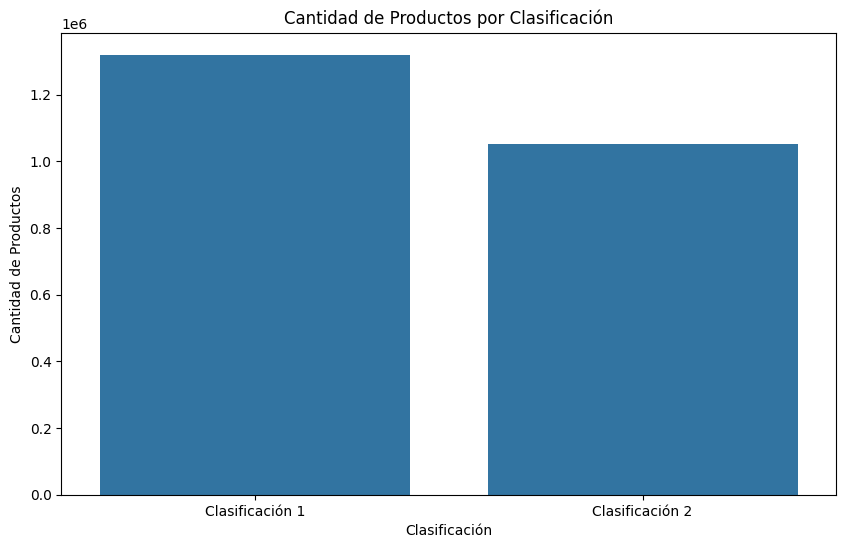

In [34]:
#Filtramos los 10 productos más comprados
top_productos = Detalle_compra.groupby(['MarcaID', 'Descripcion', 'Precio_compra'])['Cantidad'].sum().nlargest(10).reset_index()
print("Top 10 Productos Más Comprados:")
print(top_productos[['MarcaID', 'Descripcion', 'Precio_compra', 'Cantidad']])

# Gráfico de la cantidad de productos de clasificación 1 y 2
clasificacion_count = Detalle_compra['Clasificacion'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=clasificacion_count.index, y=clasificacion_count.values)
plt.title('Cantidad de Productos por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Productos')
plt.xticks([0, 1], ['Clasificación 1', 'Clasificación 2'])
plt.show()



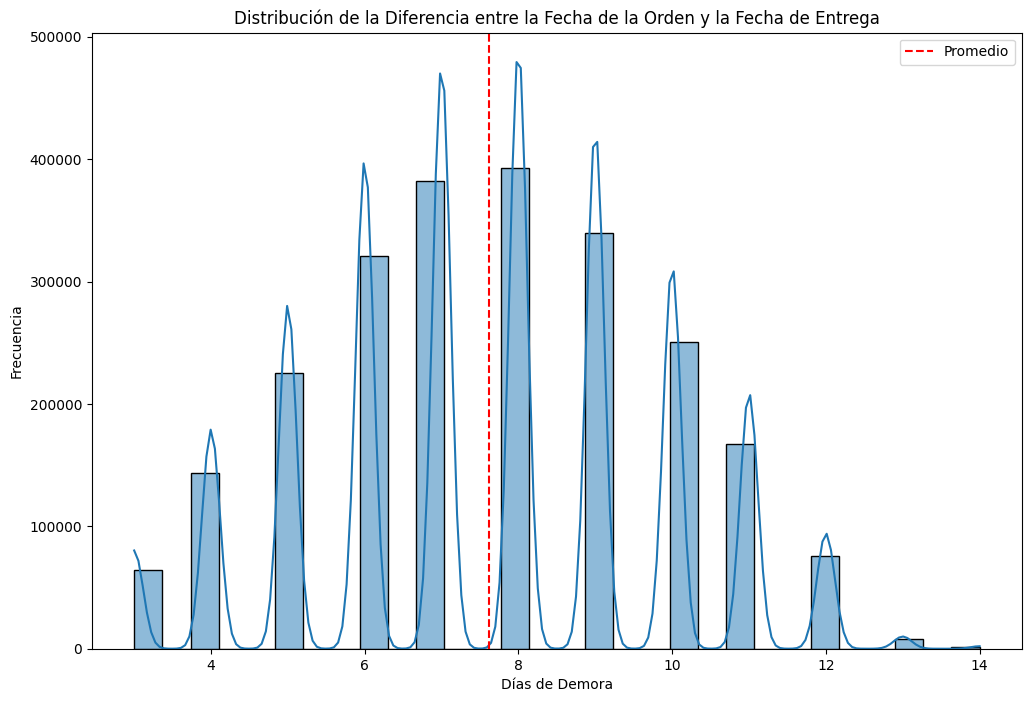

In [ ]:
# Comparamos la diferencia entre la fecha de la orden y la fecha de entrega
Detalle_compra['Diferencia_Dias'] = (Detalle_compra['Fecha_recepcion'] - Detalle_compra['Fecha_ordencompra']).dt.days
plt.figure(figsize=(12, 8))
sns.histplot(Detalle_compra['Diferencia_Dias'], bins=30, kde=True)
plt.title('Distribución de la Diferencia entre la Fecha de la Orden y la Fecha de Entrega')
plt.xlabel('Días de Demora')
plt.ylabel('Frecuencia')
plt.axvline(Detalle_compra['Diferencia_Dias'].mean(), color='red', linestyle='--', label='Promedio')
plt.legend()
plt.show()



In [35]:
#Guardamos estos procesos en un nuevo CSV
Detalle_compra.to_csv('Tabla_Detallecompras.csv', index=False)

#Imprimimos mensaje de confirmacion
print("Archivo guardado exitosamente") 

Archivo guardado exitosamente
